# PROJECT - 6

# ABALONE DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
data=pd.read_csv("abalone.csv")
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,Class
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
data.dtypes

V1        object
V2       float64
V3       float64
V4       float64
V5       float64
V6       float64
V7       float64
V8       float64
Class      int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
V1       4177 non-null object
V2       4177 non-null float64
V3       4177 non-null float64
V4       4177 non-null float64
V5       4177 non-null float64
V6       4177 non-null float64
V7       4177 non-null float64
V8       4177 non-null float64
Class    4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
data.describe()

,V2,V3,V4,V5,V6,V7,V8,Class
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [8]:
data.corr()

,V2,V3,V4,V5,V6,V7,V8,Class
V2,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
V3,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
V4,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
V5,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
V6,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
V7,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
V8,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Class,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [9]:
data.std()

V2       0.120093
V3       0.099240
V4       0.041827
V5       0.490389
V6       0.221963
V7       0.109614
V8       0.139203
Class    3.224169
dtype: float64

In [10]:
data.mean()

V2       0.523992
V3       0.407881
V4       0.139516
V5       0.828742
V6       0.359367
V7       0.180594
V8       0.238831
Class    9.933684
dtype: float64

In [11]:
data.skew()

V2      -0.639873
V3      -0.609198
V4       3.128817
V5       0.530959
V6       0.719098
V7       0.591852
V8       0.620927
Class    1.114102
dtype: float64

In [12]:
#Converting categorical data in numerical
from sklearn .preprocessing import LabelEncoder
le=LabelEncoder()
le_count=0
for col in data.columns[0:]:
   if data[col].dtype=='object':
    if len(list(data[col].unique()))<=3:
        le.fit(data[col])
        data[col]=le.transform(data[col])
        le_count +=1
print('{} columns were label encoded.',format(le_count))

{} columns were label encoded. 1


In [13]:
data.dtypes

V1         int32
V2       float64
V3       float64
V4       float64
V5       float64
V6       float64
V7       float64
V8       float64
Class      int64
dtype: object

# CHECKING OUTLIERS

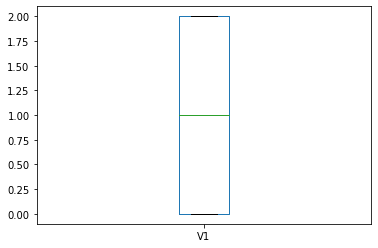

In [14]:
data["V1"].plot.box()

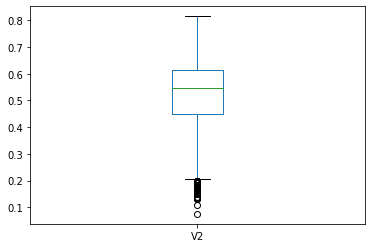

In [15]:
data["V2"].plot.box()

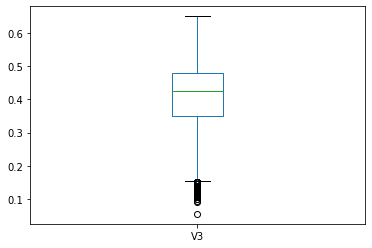

In [16]:
data["V3"].plot.box()

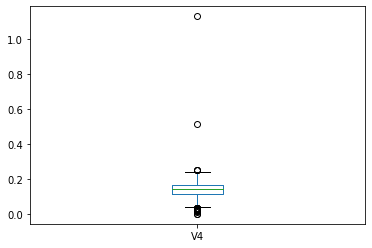

In [17]:
data["V4"].plot.box()

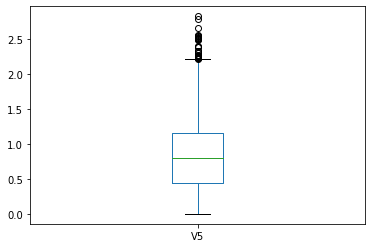

In [18]:
data["V5"].plot.box()

# REMOVING OUTLIERS

In [20]:
from scipy.stats import zscore
z=np.abs(zscore(data))
z

array([[1.15198011, 0.57455813, 0.43214879, ..., 0.72621157, 0.63821689,
        1.57154357],
       [1.15198011, 1.44898585, 1.439929  , ..., 1.20522124, 1.21298732,
        0.91001299],
       [1.28068972, 0.05003309, 0.12213032, ..., 0.35668983, 0.20713907,
        0.28962385],
       ...,
       [1.15198011, 0.6329849 , 0.67640943, ..., 0.97541324, 0.49695471,
        0.28962385],
       [1.28068972, 0.84118198, 0.77718745, ..., 0.73362741, 0.41073914,
        0.02057072],
       [1.15198011, 1.54905203, 1.48263359, ..., 1.78744868, 1.84048058,
        0.64095986]])

In [21]:
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [22]:
data_new=data[(z<3).all(axis=1)]
data_new.head()

,V1,V2,V3,V4,V5,V6,V7,V8,Class
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [23]:
from sklearn.preprocessing import normalize
data_new=normalize(data_new)

In [24]:
data_new=pd.DataFrame(data_new)
data_new.head()

,0,1,2,3,4,5,6,7,8
0,0.131963,0.030022,0.024083,0.006268,0.033915,0.014813,0.006664,0.009897,0.989724
1,0.274027,0.047955,0.036309,0.012331,0.030897,0.013633,0.006645,0.009591,0.959095
2,0.000000,0.058506,0.046363,0.014902,0.074733,0.028315,0.015620,0.023182,0.993498
3,0.195467,0.043003,0.035673,0.012217,0.050430,0.021062,0.011142,0.015149,0.977334
4,0.141090,0.046560,0.035978,0.011287,0.028924,0.012628,0.005573,0.007760,0.987632


In [25]:
print(data.shape)
print(data_new.shape)

(4177, 9)
(4027, 9)


# VISUALIZATION

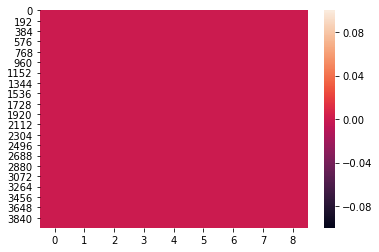

In [26]:
sns.heatmap(data_new.isnull())

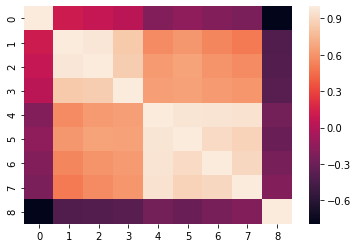

In [27]:
sns.heatmap(data_new.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C0F1828>,
      dtype=object)

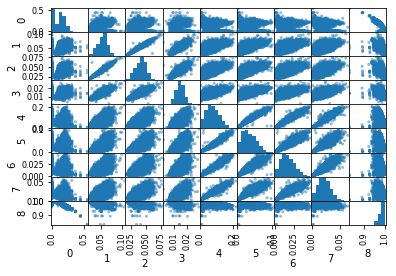

In [29]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_new)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E5A26A0>,
      dtype=object)

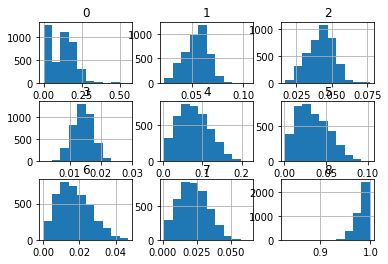

In [30]:
data_new.hist()

# SPLITTING INTO x AND y

In [32]:
x=data_new.drop(8,axis=1)
x.head()

,0,1,2,3,4,5,6,7
0,0.131963,0.030022,0.024083,0.006268,0.033915,0.014813,0.006664,0.009897
1,0.274027,0.047955,0.036309,0.012331,0.030897,0.013633,0.006645,0.009591
2,0.000000,0.058506,0.046363,0.014902,0.074733,0.028315,0.015620,0.023182
3,0.195467,0.043003,0.035673,0.012217,0.050430,0.021062,0.011142,0.015149
4,0.141090,0.046560,0.035978,0.011287,0.028924,0.012628,0.005573,0.007760


In [33]:
y=data_new[8]
y.head()

0    0.989724
1    0.959095
2    0.993498
3    0.977334
4    0.987632
Name: 8, dtype: float64

# TRAINING AND TESTING PHASE

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=100)

In [35]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3141, 8)
(886, 8)
(3141,)
(886,)


In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range (0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.21,random_state=r_state)
    lm=linear_model.LinearRegression()
    lm.fit(x_train,y_train)
    y_pred=lm.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state,'is',max_r_score)

max r2 score corresponding to 43 is 0.8894235104111076


In [40]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring="r2").mean()

0.8287959790123937

In [43]:
#max r2 score we get at random state=20
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.21,random_state=100)
lm=LinearRegression()
lm.fit(x_train,y_train)
y_pred=lm.predict(x_test)
lm.score(x_train,y_train)

0.8230597180004915

In [44]:
lm.coef_

array([-0.12447336, -0.14355301,  0.12731433, -0.29321389, -0.15276873,
        0.00629569, -0.06300841,  0.1587129 ])

In [45]:
lm.intercept_

1.0116562637151985

In [46]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("r2 score is:", r2_score(y_test,y_pred))
print("RMSE is:",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is: 0.8785562987942652
RMSE is: 0.0042602307853638515


In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [48]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
print('mean squared errror is',)
np.sqrt(mean_squared_error(y_test,rfr.predict(x_test)))

mean squared errror is


0.0006810477611294965

In [50]:
cv=cross_val_score(rfr,x_train,y_train,scoring='r2',cv=10)
cv.std()
cv.mean()

0.9932131935228098

In [51]:
params=[{
            
            'max_depth':[10,20,30,40,50,60,70,100],
            'min_samples_split':[2,3,4,7,10,12],
            'min_samples_leaf' :[1,3,5,10,15,20,25],
            'max_features':['sqrt','log2'],
            
        }
        ]

from sklearn.model_selection import GridSearchCV
gc=GridSearchCV(rfr,params,cv=10,scoring='r2',n_jobs=-1)
gc.fit(x_train,y_train)
gc.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [52]:
gc.best_score_

0.9624661785361418

In [53]:
#save the model
from sklearn.externals import joblib
joblib.dump(lm,"Abalone.pkl")

['Abalone.pkl']